# Linear Regression

_Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City), Kevin McCullough (Texas)_

#### Learning Objectives
- Define data modeling and simple linear regression.
- Build a linear regression model using a data set that meets the linearity assumption using the scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.

### Lesson Guide
- [Introduce the Bikeshare Data Set](#introduce-the-bikeshare-dataset)
	- [Read in the  Capital Bikeshare Data](#read-in-the--capital-bikeshare-data)
	- [Visualizing the Data](#visualizing-the-data)
- [Linear Regression Basics](#linear-regression-basics)
	- [Form of Linear Regression](#form-of-linear-regression)
- [Overview of Supervised Learning](#overview-of-supervised-learning)
	- [Benefits and Drawbacks of scikit-learn](#benefits-and-drawbacks-of-scikit-learn)
	- [Requirements for Working With Data in scikit-learn](#requirements-for-working-with-data-in-scikit-learn)
	- [Building a Linear Regression Model in sklearn](#building-a-linear-regression-model-in-sklearn)
	- [scikit-learn's Four-Step Modeling Pattern](#scikit-learns--step-modeling-pattern)
- [Build a Linear Regression Model](#build-a-linear-regression-model)
- [Using the Model for Prediction](#using-the-model-for-prediction)
	- [Does the Scale of the Features Matter?](#does-the-scale-of-the-features-matter)
- [Work With Multiple Features](#work-with-multiple-features)
	- [Visualizing the Data (Part 2)](#visualizing-the-data-part-)
	- [Adding More Features to the Model](#adding-more-features-to-the-model)
- [What Is Multicollinearity?](#what-is-multicollinearity)
- [How to Select a Model](#how-to-select-a-model)
	- [Feature Selection](#feature-selection)
	- [Evaluation Metrics for Regression Problems](#evaluation-metrics-for-regression-problems)
	- [Comparing Models With Train/Test Split and RMSE](#comparing-models-with-traintest-split-and-rmse)
	- [Comparing Testing RMSE With Null RMSE](#comparing-testing-rmse-with-null-rmse)
- [Feature Engineering to Improve Performance](#feature-engineering-to-improve-performance)
	- [Handling Categorical Features](#handling-categorical-features)
	- [Feature Engineering](#feature-engineering)
- [Bonus Material: Regularization](#bonus-material-regularization)
	- [How Does Regularization Work?](#how-does-regularization-work)
	- [Lasso and Ridge Path Diagrams](#lasso-and-ridge-path-diagrams)
	- [Advice for Applying Regularization](#advice-for-applying-regularization)
	- [Ridge Regression](#ridge-regression)
- [Comparing Linear Regression With Other Models](#comparing-linear-regression-with-other-models)

## What is Data Modeling?

A Data Model for a Data Scientist is an artifact created by the machine learning process one might even consider a program in its own right. The model will accept data and return the appropriate output. 

The overall process is fairly linear and is the end result of our Data Science process. Our goal is to:

1. Create a Hypothesis or a question we want to test/explore

2. Load, clean and transform relevant data

3. Identify relevant features/variables for both the question and the model

4. Build a process with an appropriate machine learning algorithm or statistical methodology that suits your data, use case, and available computational resources

5. Test, evaluate and refine your model. Often, Data Scientists create numerous models until aligning on the one creating the best output

6. Deploy the model - This can be accomplished through batch processing or moved into a real time production environment

7. Monitor and refine the model over time


The end result is a clear and defined process to accept raw information and create predictive or prosciptive insights to your organization.

<a id="introduce-the-bikeshare-dataset"></a>
## Introduce the Bikeshare Data Set
---

We'll be working with a data set from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

The objective of the competition is to **predict total ridership of Capital Bikeshare in any given hour.**

Demand forecasting is a common data science application. If we can predict the quantity of demand, total ridership in a given hour, we can create analytical tools to improve the bikeshare system. 
Some applications would be:
* Find where to site new bikeshare stations and know how large of a station to build.
* Calculate the expected wear and tear on bikes and what the replacement costs will be.
* Use a slightly different research design to forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another, as sometimes bikeshare stations have no bikes or are completely full and prevent use of the station.

In [1]:
# Standard imports
import pandas as pd
import numpy as np

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

# Specific imports
# These are new! Notice we're using the 'from' approach to import only what we need.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Statistics imports
import statsmodels.api as sm
from scipy import stats

# magic and parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

<a id="read-in-the--capital-bikeshare-data"></a>
### Read In the Capital Bikeshare Data

In [2]:
# Read the data and set the datetime as the index.
url = '../data/bikeshare.csv'
bikes_df = pd.read_csv(url, index_col='datetime', parse_dates=True)

Notice that we used `index_col` to set an index or primary key for our data. In this case, the index of each row will be set to the value of its `datetime` field.

We also ask Pandas to parse dates (if `parse_dates=True`, for the index only). So, rather than reading in a string, Pandas converts the index string to a `datetime` object.

In [3]:
# Preview the first five rows of the DataFrame.
bikes_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### What does each observation represent?

In [4]:
# A:

#### What is the response variable (as defined by Kaggle)?

In [5]:
# A:

#### How many features are there?

In [6]:
# A:

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1=winter, 2=spring, 3=summer, 4=fall |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| See Below|
|temp| temperature in Celsius|
|atemp| "feels like" temperature in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-registered user rentals initiated|
|registered| number of registered user rentals initiated|
|count| number of total rentals|

> _Details on Weather Variable_

> **1**: Clear, Few clouds, Partly cloudy, Partly cloudy

> **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

> **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

> **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### "count" is a method in Pandas (and a very non-specific name), so it's best to name that column something else

In general, you may want to rename columns if it is not obvious what might be stored in them. Although we will only rename the target column here, a few examples might be to rename:

| old name | new name |
| ---    | --- |
| temp | temp_celcius
| windspeed | windspeed_knots
| casual | num_casual_users
| registered | num_registered_users
| season | season_num
| holiday | is_holiday
| workingday | is_workingday
| humidity | humidity_percent

Without having to check, these new names make it obvious what is stored in each column. The downside is slightly longer column names, which could affect table readability in Jupyter. It would be ideal to use very specific names in CSV files to assist others reading them. In your own code, use whatever makes sense for your work -- if you are viewing lots of Pandas tables, you may want to use shorter names. However, readable specific names are preferred in Python code since it prevents mistakes.

In [7]:
# Use the .rename() method to rename count to total
bikes_df.rename(columns={'count':'total_rentals'}, inplace=True)

In [8]:
bikes_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


<a id="visualizing-the-data"></a>
### Visualizing the Data

It is important to have a general feeling for what the data looks like before building a model. Ideally, before creating the model you would have some sense of which variables might matter most to predict the response. This dataset is fairly intuitive (and the purpose of this lesson is not visualization), so we will keep the visualization short.

**View the distribution of total rentals**

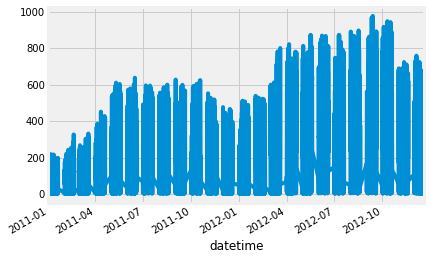

In [9]:
bikes_df.total_rentals.plot()

**View variable correlations**

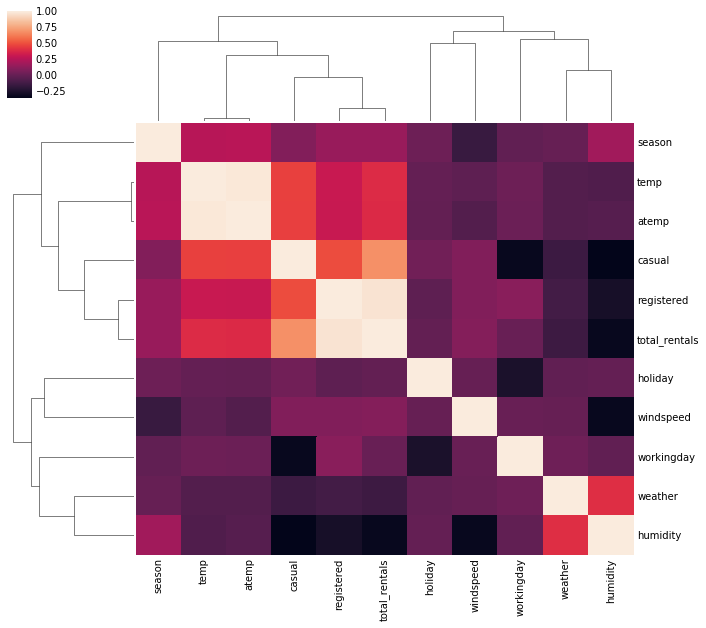

In [10]:
sns.clustermap(bikes_df.corr());

**Variable relationships**

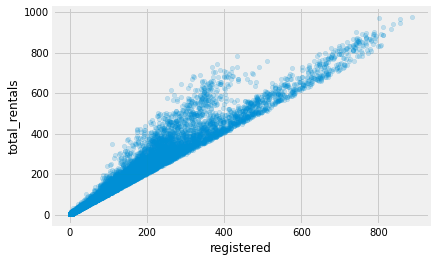

In [11]:
# Pandas scatterplot
bikes_df.plot(kind='scatter', x='registered', y='total_rentals', alpha=0.2);

#### Classroom Discussion
What is wrong with using `registered` as a variable in the model?

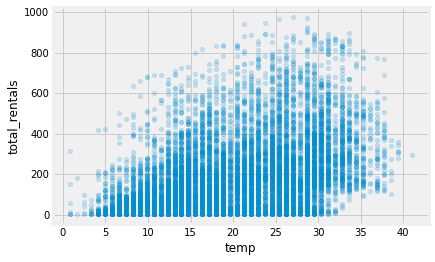

In [12]:
# Pandas scatterplot
bikes_df.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

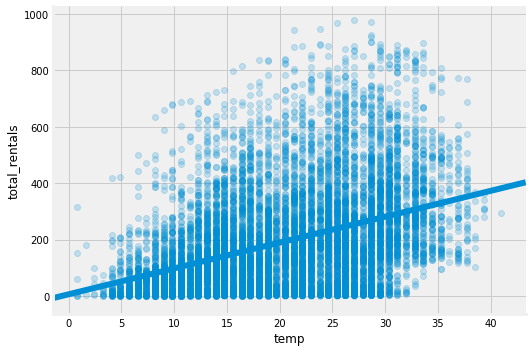

In [13]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes_df, aspect=1.5, scatter_kws={'alpha':0.2});

<a id="linear-regression-basics"></a>
## Linear Regression Basics
---

### When it works best

Data is normally distributed (but doesn't have to be)
X's significantly explain y (low p-values)
X's are independent of each other (little to no multicollinearity)
Resulting values pass a linear assumption 

The regression has six key assumptions:

1. Linear relationship between target and features
2. Data is normally distributed or contains Multivariate normality (but doesn't have to be)
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity
6. Independent features

Note: If data is not normally distributed, we could be introducing bias

**1. Linear Relationship** 

First, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots

**2. Normal Distribution**

Since the linear regression analysis requires all variables to be multivariate normal it can be checked with a histogram or Q-Q plot. Normality can also be checked with a goodness of fit test like the [Kolmogorov-Smirnov] test(https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) . When the data is not normally distributed it's possible a non-linear transformation (e.g., log-transformation) might fix this issue.

**3. Low to No Multicollinearity**

Multicollinearity occurs when the independent variables are too highly correlated with each other. A quick way to test this is our tried and true correlation matrix. 

If multicollinearity is found in the data centering the data, that is deducting the mean score might help to solve the problem.  Other alternatives to tackle the problems is conducting a factor analysis and rotating the factors to insure independence of the factors in the linear regression analysis.

**4. Low to No Auto-correlation**

Linear regression analysis requires that there is little or no autocorrelation in the data.  Autocorrelation occurs when the residuals are not independent from each other.  In other words when the value of y(x+1) is not independent from the value of y(x). Examples are signal processing or time series data

While a scatterplot allows you to check for autocorrelations, you can test the linear regression model for autocorrelation with the [Durbin-Watson test](http://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html).  Durbin-Watson’s d tests the null hypothesis that the residuals are not linearly auto-correlated.  While d can assume values between 0 and 4, values around 2 indicate no autocorrelation.  As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data. However, the Durbin-Watson test only analyses linear autocorrelation and only between direct neighbors, which are first order effects.


**5. Homoscedasticity**

Homoscedastic data means the residuals are equal across the regression line. We can test this with scatterplots or seaborn's lmplot()

**6. Independent features**

Independent features are in no way derived from other features. Imagine a dataset composed of three features. The first two features are in no way related but the third feature is simply the sum of the first two. That means this ficitonal dataset has one linearly dependent feature. That’s a problem for linear regression since we expect to interpret our outputs as X increase in feature A drives an increase of Y units of the response variable. However, if features are correlated, you lose the ability to interpret the linear regression model because you violate a fundamental assumption.



<a id="form-of-linear-regression"></a>
### Form of Linear Regression

Recall that each model always contains some amount of random irreducible error $\epsilon$. So, given a prediction $\hat{y}$, the actual $y = \hat{y} + \epsilon$. Below, we will assume $y$ is exactly linear.

- We are often taught the formula for a line is: $y = mx + b$.
- Note this can alternatively be written: $y = \alpha + \beta X$.

---

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).
- $\epsilon$ is the _error_ term

A practical example of this applied to our data might be:

$total\_rides = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. Note that because the $\beta$ values are constants, they will not be independent variables in the final model, as seen above.

---

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](../assets/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

<a id="overview-of-supervised-learning"></a>
## Overview of Supervised Learning
---

![Supervised learning diagram](../assets/supervised_learning.png)

<a id="benefits-and-drawbacks-of-scikit-learn"></a>
### Benefits and Drawbacks of scikit-learn

**Benefits:**

- Consistent interface to machine learning models.
- Provides many tuning parameters but with sensible defaults.
- Exceptional documentation.
- Rich set of functionality for companion tasks.
- Active community for development and support.

**Potential drawbacks:**

- Harder (than R) to get started with machine learning.
- Less emphasis (than R) on model interpretability.
    - scikit-learn tends not to run detailed statistical tests, e.g. ANOVA.
    - For more detail on model fit, try the `statsmodels` library.

Ben Lorica: [Six Reasons Why I Recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

<a id="requirements-for-working-with-data-in-scikit-learn"></a>
### Requirements for Working With Data in scikit-learn

1. Features and response should be separate objects.
2. Features and response should be entirely numeric.
3. Features and response should be NumPy arrays (or easily converted to NumPy arrays).
4. Features and response should have specific shapes (outlined below).

<a id="building-a-linear-regression-model-in-sklearn"></a>
### Building a Linear Regression Model in sklearn

#### Create a feature matrix called X that holds a `DataFrame` with only the temp variable and a `Series` called y that has the "total_rentals" column.

In [14]:
# Create X and y.
feature_cols = ['temp']
X = bikes_df[feature_cols]
y = bikes_df['total_rentals']

In [15]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [16]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [17]:
# Check X's shape (n = number of observations, p = number of features).
print((X.shape))

(10886, 1)


In [18]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print((y.shape))

(10886,)


<a id="scikit-learns--step-modeling-pattern"></a>
### scikit-learn's Four-Step Modeling Pattern

**Step 1:** Import the class you plan to use. <br> 
**Step 2:** "Instantiate" the "estimator." <br>
**Step 3:** Fit the model with data (aka "model training"). <br>
**Step 4:** Predict the response for a new observation. <br>
<br>
<br>
<br>
**Step 1:** Import the class you plan to use.

In [21]:
from sklearn.linear_model import LinearRegression

**Step 2:** "Instantiate" the "estimator."

- "Estimator" is scikit-learn's term for "model."
- "Instantiate" means "make an instance of."

In [22]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

- Created an object that "knows" how to do linear regression, and is just waiting for data.
- Name of the object does not matter.
- All parameters not specified are set to their defaults.
- Can specify tuning parameters (aka "hyperparameters") during this step. 

To view the possible parameters, either use the `help` built-in function or evaluate the newly instantiated model, as follows:

In [23]:
# help(lr)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Step 3:** Fit the model with data (aka "model training").

- Model is "learning" the relationship between X and y in our "training data."
- Process through which learning occurs varies by model.
- Occurs in-place.

In [24]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

6.04621295961681
[9.17054048]


Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the "temp" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1 degree Celcius is _associated with_ increasing the number of total rentals by $\beta_1$.
- Here, a temperature increase of 1 degree Celsius is _associated with_ a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in total rentals.
- $\beta_1$ would be **zero** if temperature is not associated with total rentals.

In [26]:
dict(zip(lr.coef_,X.columns))

{9.170540481426237: 'temp'}

- Once a model has been fit with data, it's called a "fitted model."

**Step 4:** Predict the response for a new observation.

- New observations are called "out-of-sample" data.
- Uses the information it learned during the model training process.

In [27]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
#lr.predict(np.array([0])) #.reshape(1,-1))

In [28]:
lr.predict(np.array([0]).reshape(1,-1))

array([6.04621296])

Let's ask the model to make two predictions, one when the `temp` is 0 and another when the `temp` is 10. To do this, our feature matrix is always a 2-D array where each row is a list of features. Since we only have a single feature, the temperature, each row will contain only a single value.

In [29]:
X_new = [[0], [10]]
lr.predict(X_new)

array([ 6.04621296, 97.75161777])

- Returns a NumPy array, and we keep track of what the numbers "mean."
- Can predict for multiple observations at once.

What we just predicted using our model is, "If the temperature is 0 degrees, the total number of bike rentals will be ~6.046, and if the temperature is 10 degrees the total number of bike rentals will ~97.751."

## General Format for sklearn model classes & methods

#### Generate an instance of an estimator class
estimator = base_models.AnySKLearnObject()
#### Fit your data
estimator.fit(X, y)
#### Score it with the default scoring method (recommended to use the metrics module in the future)
estimator.score(X, y)
#### Predict a new set of data
estimator.predict(new_X)
#### Transform a new X if changes were made to the original X while fitting
estimator.transform(new_X)

- LinearRegression() doesn’t have a transform function

- With this information, we can build a simple process for linear regression.



<a id="build-a-linear-regression-model"></a>
### Exercises

#### 1. Las Vegas Simple Model
We will use a [dataset](https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip) of Tripadvisor reviews of Las Vegas hotels from 2015 to build a regression model predicting the customers score.

In [30]:
lv_reviews = pd.read_csv('../data/LasVegasTripAdvisorReviews-Dataset.csv')

In [31]:
lv_reviews.head(2)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday


**Create a correlation clustermap of the variables.**

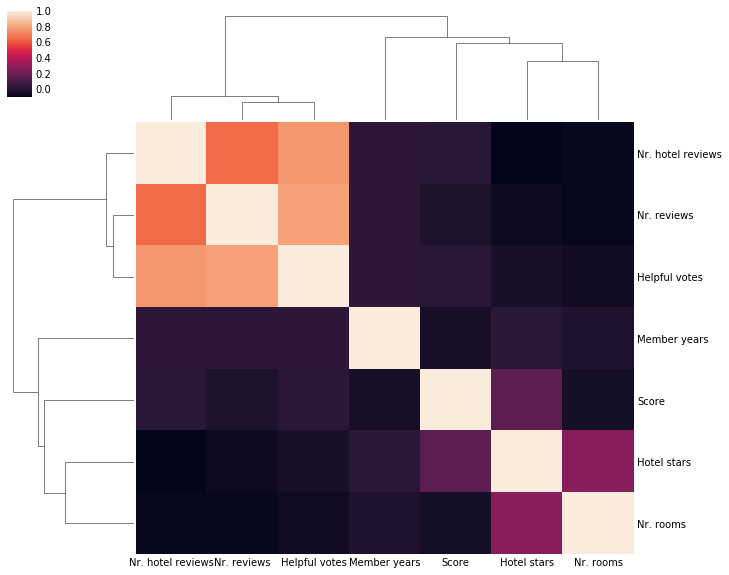

In [32]:
sns.clustermap(lv_reviews.corr());

**View the distribution of the Score variable using a histogram.**

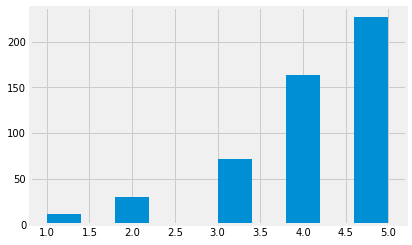

In [33]:
lv_reviews['Score'].hist();

**Create X and y using Hotel stars as the X variable and Score as the y variable.**

In [34]:
feature_cols = ['Hotel stars']
X = lv_reviews[feature_cols]
y = lv_reviews['Score']

#### Instantiate and fit a `LinearRegression` model on X and y from the `linear_model` section of scikit-learn.

In [35]:
# Import, instantiate, fit.
#from sklearn.linear_model import LinearRegression # already imported
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print the coefficients and intercept.**

In [36]:
print(linreg.intercept_)
print(linreg.coef_)

3.3667728237791925
[0.18683652]


**Interpret the coefficients and intercept.**

Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- The estimated score when the hotel has 0 stars.
- **Note:** This is a case where the intercept would not be sensible, but it is still important to score observations.

Interpreting the "Hotel stars" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1 star is _associated with_ increasing the user score by $\beta_1$.
- Here, a temperature increase of 1 star is _associated with_ a predicted increase of 0.187 in the score.
- This is not a statement of causation.

<a id="using-the-model-for-prediction"></a>
## Using the Model for Prediction
---

While plenty of insight can be found in reading coefficients, the most common uses of data science focus on prediction. In scikit-learn we can make predictions from a fitted model using `.predict()`, but we will also go through the calculation by hand to understand it.

#### How many bike rentals would we predict if the temperature was 25 degrees Celsius?

#### Explore the intercept and coefficients of the linear model.

You can search for "sklearn linear regression" and explore the attributes section of the documentation to learn how to do this.

In [37]:
# Manually calculate the prediction.
print(lr.intercept_+lr.coef_*25)
print(6.04621295961681+9.17054048*25)

[235.309725]
235.3097249596168


In [38]:
# Use the predict method.
lr.predict([[25]])

array([235.309725])

<a id="does-the-scale-of-the-features-matter"></a>
### Does the Scale of the Features Matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [ ]:
# Create a new column for Fahrenheit temperature.
bikes_df['temp_F'] = bikes_df.temp * 1.8 + 32
bikes_df.head()

In [ ]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp_F', y='total_rentals', data=bikes_df, aspect=1.5, scatter_kws={'alpha':0.2});

#### Rebuild the `LinearRegression` from above using the `temp_F` features instead.

In [ ]:
# Create X and y.
feature_cols = ['temp_F']
X = bikes_df[feature_cols]
y = bikes_df.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

#### Convert 25 degrees Celsius to Fahrenheit.

In [ ]:
# A function to convert Celsius to Fahrenheit temperature scale

def celsius_fahrenheit(temp, cflag=True):
    """convert temperature from celsius to fahrenheit or fahrenheit to celsius

        Uses the formula:
                    F = C*1.8 + 32
                    C = (F-32)/1.8
                    
    Args: temp: temperature in celsius or fahrenheit as an int or float
          cflag: boolean, if true convert C-F, if false convert F-C
    
    Returns: converted temperature"""
    
    if cflag:
        new_temp = temp*1.8 + 32
    else:
        new_temp = (temp - 32)/1.8
        
    return new_temp

assert celsius_fahrenheit(77, False) == 25

In [ ]:
F = celsius_fahrenheit(25)
F

#### Predict rentals for 77 degrees Fahrenheit.

In [ ]:
print(f'77 Degrees Fahrenheit Prediction {linreg.predict([[77]])} bikes rented.')
print(f'25 Degrees Celsius Prediction {lr.predict([[25]])} bikes rented')


**Conclusion:** The scale of the features is irrelevant for linear regression models. When changing the scale, we simply change our interpretation of the coefficients.

In [ ]:
# Remove the temp_F column.
bikes_df.drop('temp_F', axis=1, inplace=True)

<a id="work-with-multiple-features"></a>
## Work With Multiple Features
---

We've demonstrated simple linear regression with one feature to gain an intuition, but the benefit of modeling is the ability to reason about hundreds of features at once. There is no limit to the number of features you can use. However, often a small set of features accounts for most of the variance (assuming there is a linear relationship at all). We will start by using four features.

<a id="visualizing-the-data-part-"></a>
### Visualizing the Data (Part 2)

#### Explore more features.

In [ ]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']

#### Create a subset of scatterplot matrix using Seaborn.
We can use pairplot with the y_vars argument to only show relationships with the `total_rentals` variable

In [ ]:
# multiple scatterplots in Seaborn
sns.pairplot(bikes_df, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

In [ ]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of *every* column

grr = pd.plotting.scatter_matrix(bikes_df[['total_rentals'] + feature_cols], figsize=(15, 15), alpha=0.7)

#### Are you seeing anything you didn't expect?

#### Explore the#### Explore the season variable using a cross-tab.
**From the docstring**: "Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed." season variable using a cross-tab.

In [ ]:
# Cross-tabulation of season and month
pd.crosstab(bikes_df['season'], bikes_df.index.month)

#### Explore the season variable using a box plot.

In [ ]:
# Box plot of rentals, grouped by season
bikes_df.boxplot(column='total_rentals', by='season');

#### Look at rentals over time.

In [ ]:
# Line plot of rentals
bikes_df['total_rentals'].plot();

#### What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing overall growth and the winter months happen to come after the spring months.

#### Look at the correlation matrix for the bikes `DataFrame`.

In [ ]:
# Correlation matrix (ranges from 1 to -1)
bikes_df.corr()

#### Use a heat map to make it easier to read the correlation matrix.

In [ ]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes_df.corr())

In [ ]:
sns.clustermap(bikes_df.corr());

#### What relationships do you notice?

In [ ]:
# A:

Why would you not include `temp` and `atemp` together even though they are the closest related to `total_rentals`?

<a id="adding-more-features-to-the-model"></a>
### Adding More Features to the Model

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of one another, but all of them should help explain the y variable.

#### Create another `LinearRegression` instance that is fit using temp, season, weather, and humidity.

In [ ]:
# Create a list of features.
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [ ]:
# Create X and y.
X = bikes_df[feature_cols]
y = bikes_df.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

#### Display the linear regression coefficient along with the feature names.

In [ ]:
# Pair the feature names with the coefficients.

# We can use a list or dictionary to do this. Sometimes it's convenient for 
# display purposes. But which data type you use depends on what your needs are.
list(zip(feature_cols, linreg.coef_))

#dict(zip(feature_cols, linreg.coef_))

Interpreting the coefficients:

- Holding all other features fixed, a 1-unit increase in temperature is associated with a rental increase of 7.86 bikes.
- Holding all other features fixed, a 1-unit increase in season is associated with a rental increase of 22.5 bikes.
- Holding all other features fixed, a 1-unit increase in weather is associated with a rental increase of 6.67 bikes.
- Holding all other features fixed, a 1-unit increase in humidity is associated with a rental decrease of 3.12 bikes.

Does anything look incorrect and does not reflect reality?

## Do X's significantly explain y? (i.e. do they have low P-Values).

Unfortunately the Scikit learn linear regressor doesn't have a method to calculate p-values. There are a few ways we can solve for this one:
1. Extend the linear regressor class (advanced)
2. Run analysis against our dataset independently (statsmodel.api)
3. Import another package to assist (regressors)
4. Calculate the p-values with linear algebra (essentially what we'd automate in step 1)

We could calculate these manually - but for efficiency we're going to use the statsmodels.api we imported as sm at the beginning of this notebook.

**Since we haven't updated our linear regression model we could simply see the p-values from a standards OLS model from statsmodels.api which we imported as SM.**

**Typically, the heuristics for significant p-values are either <.05 or <.10.**

Statsmodels is a good method to analyze your data before you put it into your model. Once you understand the significance of different variables, you can build the final model using sklearn which includes more useful features.

In [ ]:
X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) #Tada!

<a id="what-is-multicollinearity"></a>
## What Is Multicollinearity?
---

Multicollinearity happens when two or more features are highly correlated with each other. The problem is that due to the high correlation, it's hard to disambiguate which feature has what kind of effect on the outcome. In other words, the features mask each other. 

There is a second related issue called variance inflation where including correlated features increases the variability of our model and p-values by widening the standard errors. This can be measured with the variance inflation factor, which we will not cover here.

#### Create a linear model that predicts `total_rentals` using `temp` and `atemp`.

In [ ]:
# Create a list of features.
feature_cols = ['temp','atemp']

In [ ]:
# Create X and y.
X = bikes_df[feature_cols]
y = bikes_df['total_rentals']

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(list(zip(feature_cols,linreg.coef_)))

#### Go back and remove either `temp` or `atemp` from the feature list. How do the coefficients change? 

In [ ]:
# A:
#feature_cols = ['temp']
#feature_cols = ['atemp']

### Exercises
#### 2. Las Vegas Multiple Variable Model 
Using the Las Vegas Trip Advisor data, build a model using 2 variables: `Hotel stars` and `Nr. reviews`.

In [ ]:
lv_reviews.columns

In [ ]:
# Create a list of features.
feature_cols = ['Hotel stars', 'Nr. reviews']

# Create X and y.
X = lv_reviews[feature_cols]
y = lv_reviews.Score


# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

**Give your interpretations of the coefficients.**

**Using statsmodels, interpret the coefficients?  Are any of them insignificant?**

In [ ]:
X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) #Tada!

**What would be your next steps?**

# Transform, Score and compare RMSE.
<a id="how-to-select-a-model"></a>
## How to Select a Model
---

We can make linear models now, but how do we select the best model to use for our applications? We will offer a general procedure and a simple metric that works well in many cases. That said, it's important to keep the business context in mind and know that there are alternative metrics that can work better.

<a id="feature-selection"></a>
### Feature Selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use p-values or R-squared for feature selection?

- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- If all of the assumptions of a linear model are met, p-values suggest a coefficient that differs from zero at a level of statistical significance. This does not mean that
    1. the feature _causes_ the response
    2. the feature strongly _predicts_ the response. 
- Adding features to your model that are unrelated to the response will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this (although, AIC and BIC do).
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a machine learning methodology.
- This course focuses on general purpose approaches that can be applied to any model, rather than model-specific approaches.

<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation Metrics for Regression Problems

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# Example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

#### Calculate MAE, MSE, and RMSE using imports from sklearn metrics and NumPy.

In [ ]:
# Calculate these metrics by hand!
# from sklearn import metrics

print(f'MAE: {mean_absolute_error(true, pred)}')
print(f'MSE:, {mean_squared_error(true, pred)}')
print(f'RMSE:, {np.sqrt(mean_squared_error(true, pred))}')

Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punishes larger errors:

In [ ]:
# Same true values as above
true = [10, 7, 5, 5]

# New set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before.
print(f'MAE: {mean_absolute_error(true, pred)}')

# MSE and RMSE are larger than before.
print(f'MSE:, {mean_squared_error(true, pred)}')
print(f'RMSE:, {np.sqrt(mean_squared_error(true, pred))}')

<a id="comparing-models-with-traintest-split-and-rmse"></a>
### Comparing Models With Train/Test Split and RMSE

In [ ]:
#from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols, response):
    """accepts a list of features and returns testing RMSE"""

    X = df[feature_cols]
    y = df[response]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Compare different sets of features.

feature_set_1 = train_test_rmse(bikes_df, ['temp', 'season', 'weather', 'humidity'], 'total_rentals')
feature_set_2 = train_test_rmse(bikes_df, ['temp', 'season', 'weather'],'total_rentals')
feature_set_3 = train_test_rmse(bikes_df, ['temp', 'season', 'humidity'],'total_rentals')

print(f"['temp', 'season', 'weather', 'humidity']: {feature_set_1}")
print(f"            ['temp', 'season', 'weather']: {feature_set_2}")
print(f"           ['temp', 'season', 'humidity']: {feature_set_3}")



In [ ]:
# Append scores to dataset
X = bikes_df[['temp', 'season', 'humidity']]
y = bikes_df['total_rentals']
    
# Split the data into training and testing data sets - 
# we use random_state to ensure our split is repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Instantiate
linreg = LinearRegression()

# Fit
linreg.fit(X_train, y_train)

# Predict
bikes_df['y_pred']= linreg.predict(X)

In [ ]:
bikes_df.head(10)

**What weird results do you notice?**

In [ ]:
# Using these as features is not allowed! Why?
casual_reg = train_test_rmse(bikes_df, ['casual', 'registered'],'total_rentals')
print(f'RMSE for features casual & registered: {casual_reg}')

<a id="comparing-testing-rmse-with-null-rmse"></a>
### Comparing Testing RMSE With Null RMSE

Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [ ]:
# Create X and y.
X = bikes_df['temp']
y = bikes_df['total_rentals']

# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

In [ ]:
# Compute null RMSE.
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_null))}')

### Transforming the Target Variable

**We will try both a square root and log transformation**

In [ ]:
bikes_df['y_sqrt']= np.sqrt(y, dtype=float)
bikes_df['y_cbrt']= np.cbrt(y, dtype=float)
bikes_df['y_log']= np.log(y, dtype=float)

**Plot the distribution of the transformations**

In [ ]:
bikes_df['y_sqrt'].plot();
bikes_df['y_cbrt'].plot();
bikes_df['y_log'].plot();

**Modify our function to accept transformations**

In [ ]:
def train_test_rmse_transform(df, feature_cols, response,transformation):
    X = df[feature_cols]
    y = df[response]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    if transformation == 'sqrt':
        y_pred_sqrt = linreg.predict(X_test)
        y_pred = np.square(y_pred_sqrt)
    elif transformation == 'log':
        y_pred_log = linreg.predict(X_test)
        y_pred = np.exp(y_pred_log)
    elif transformation == 'cbrt':
        y_pred_cbrt = linreg.predict(X_test)
        y_pred = y_pred_cbrt**3
        
    return np.sqrt(mean_squared_error(y_test, y_pred))

**Check the RMSE of the square root transformation**

In [ ]:
rmse_sqrt_1 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather', 'humidity'], 'y_sqrt', 'sqrt')
rmse_sqrt_2 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather'],'y_sqrt', 'sqrt')
rmse_sqrt_3 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'humidity'],'y_sqrt', 'sqrt')

print(f"['temp', 'season', 'weather', 'humidity'] RMSE: {rmse_sqrt_1}")
print(f"            ['temp', 'season', 'weather'] RMSE: {rmse_sqrt_2}")
print(f"           ['temp', 'season', 'humidity'] RMSE: {rmse_sqrt_3}")




**Check the RMSE of the cube root transformation**

In [ ]:
rmse_cbrt_1 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather', 'humidity'], 'y_cbrt', 'cbrt')
rmse_cbrt_2 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather'], 'y_cbrt', 'cbrt')
rmse_cbrt_3 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'humidity'], 'y_cbrt', 'cbrt')

print(f"['temp', 'season', 'weather', 'humidity'] RMSE: {rmse_cbrt_1}")
print(f"            ['temp', 'season', 'weather'] RMSE: {rmse_cbrt_2}")
print(f"           ['temp', 'season', 'humidity'] RMSE: {rmse_cbrt_3}")

**Check the RMSE of the log transformation**

In [ ]:
rmse_log_1 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather', 'humidity'], 'y_log', 'log')
rmse_log_2 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'weather'],'y_log', 'log')
rmse_log_3 = train_test_rmse_transform(bikes_df, ['temp', 'season', 'humidity'],'y_log', 'log')

print(f"['temp', 'season', 'weather', 'humidity'] RMSE: {rmse_log_1}")
print(f"            ['temp', 'season', 'weather'] RMSE: {rmse_log_2}")
print(f"           ['temp', 'season', 'humidity'] RMSE: {rmse_log_3}")

**Append the model scores to the original dataset**

In [ ]:
X = bikes_df[['temp', 'season', 'weather']]
y = bikes_df['y_log']
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Instantiate
linreg = LinearRegression()

# Fit
linreg.fit(X_train, y_train)

In [ ]:
# Predict
bikes_df['y_pred_log']= np.exp(linreg.predict(X))

In [ ]:
bikes_df.head(50)

### Exercises
#### 3. Las Vegas Model Comparison

**Create a baseline/null model result to compare your models.**

In [ ]:
# Create X and y.
X = lv_reviews['Hotel stars']
y = lv_reviews.Score

# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())

# Compute null RMSE.
np.sqrt(mean_squared_error(y_test, y_null))

**Compare the single variable and multiple variable models using the `train_test_rmse` function.**

In [ ]:
rmse_star = train_test_rmse(lv_reviews, ['Hotel stars'], 'Score')
print(f'Hotel Stars - RMSE: {rmse_star}')

In [ ]:
rmse_star_nr = train_test_rmse(lv_reviews, ['Hotel stars','Nr. reviews'], 'Score')
print(f'Hotel Stars, Nr Reviews - RMSE: {rmse_star_nr}')

**Which model is better?**

**Why is the RMSE significantly lower than the RMSE in the bikes model?**

**Square root transform the Score variable and compare the RMSE using the `train_test_rmse_transform` function.**

In [ ]:
lv_reviews['Score_sqrt'] = np.log(lv_reviews['Score'])

In [ ]:
lv_reviews['Score_sqrt'].hist();

In [ ]:
rmse_star_sqrt = train_test_rmse_transform(lv_reviews, ['Hotel stars'], 'Score_sqrt','sqrt')

print(f'Hotel Stars (sqrt) - RMSE: {rmse_star_sqrt}')

**What would you recommend?**

<a id="feature-engineering-to-improve-performance"></a>
## Feature Engineering to Improve Performance
---

Machine learning models are very powerful, but they cannot automatically handle every aspect of our data. We have to explicitly modify our features to have relationships that our models can understand. In this case, we will need to pull out features to have a linear relationship with our response variable.


<a id="handling-categorical-features"></a>
### Handling Categorical Features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** Transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** Use dummy encoding (0/1). Here, each possible category would become a separate feature.

What are the categorical features in our data set?

- **Ordered categories:** `weather` (already encoded with sensible numeric values)
- **Unordered categories:** `season` (needs dummy encoding), `holiday` (already dummy encoded), `workingday` (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an ordered relationship. Instead, we create multiple dummy variables.

#### Create dummy variables using `get_dummies` from Pandas.

In [ ]:
# Use get_dummies to transform categorical features into one-hot encoded data

season_dummies = pd.get_dummies(bikes_df['season'], prefix='season')

season_dummies.head()

#### Inspect the `DataFrame` of `dummies`.

In [ ]:
# Print five random rows.
season_dummies.sample(n=5, random_state=1)


However, we actually only need three dummy variables (not four), and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the baseline level.

This circles back to the concept multicollinearity, except instead of one feature being highly correlated to another, the information gained from three features is directly correlated to the fourth.

#### Drop the first column.

In [ ]:
# drop the first column
#season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# Redo the get_dummies command and use 'drop_first' to drop the first dummy column.
season_dummies = pd.get_dummies(bikes_df['season'], prefix='season', drop_first=True)

season_dummies.head()

#### Reinspect the `DataFrame` of `dummies`.

In [ ]:
# Print five random rows.
season_dummies.sample(n=5, random_state=1)

In general, if you have a categorical feature with k possible values, you create k-1 dummy variables.

If that's confusing, think about why we only need one dummy variable for `holiday`, not two dummy variables (`holiday_yes` and `holiday_no`).

#### We now need to concatenate the two `DataFrames` together.

In [ ]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes_df, season_dummies], axis=1)

# Print 5 random rows.
bikes_dummies.sample(n=5, random_state=1)

#### Rerun the linear regression with dummy variables included.

In [ ]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

# Instantiate
linreg = LinearRegression()

# Fit
linreg.fit(X, y)

# display the coefficients along with their names
list(zip(feature_cols, linreg.coef_))

How do we interpret the season coefficients? They are measured against the baseline (spring):

- Holding all other features fixed, summer is associated with a rental decrease of 3.39 bikes compared to the spring.
- Holding all other features fixed, fall is associated with a rental decrease of 41.7 bikes compared to the spring.
- Holding all other features fixed, winter is associated with a rental increase of 64.4 bikes compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our interpretation of the coefficients.

In most situations, it is best to have the dummy that is your baseline be the category that has the largest representation.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [ ]:
# Compare original season variable with dummy variables.
rmse_dummy_1 = train_test_rmse(bikes_dummies, ['temp', 'season', 'humidity'],'total_rentals')
rmse_dummy_2 = train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4', 'humidity'],'total_rentals')

print(f"['temp', 'season', 'humidity'] RMSE: {rmse_dummy_1}")
print(f"['temp', 'season_2', 'season_3', 'season_4', 'humidity'] RMSE: {rmse_dummy_2}")


### Exercises
#### 4. Bike Weather Dummy Variables
Build dummy variables for weather, append it to the `bike_dummies` dataframe, and check the model performance with both `total rentals` and the log transformation, using `temp`, `season` and `weather`. Use the `drop_first=True` parameter in `pd.get_dummies`.

Once complete, check the results of the log transformation just using `temp` as a variable.

In [ ]:
weather_dummies = pd.get_dummies(bikes_df['weather'], prefix='weather', drop_first=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes_dummies, weather_dummies], axis=1)


In [ ]:
bikes_dummies.columns

In [ ]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4','weather_2','weather_3','weather_4']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

In [ ]:
print(train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4','weather_2','weather_3','weather_4'],'total_rentals'))

In [ ]:
#Log transform y
bikes_dummies['y_log'] = np.log(bikes_dummies.total_rentals)

In [ ]:
#Build the model
linreg = LinearRegression()
linreg.fit(X, bikes_dummies['y_log'])

list(zip(feature_cols, linreg.coef_))

In [ ]:
rmse_transform = train_test_rmse_transform(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4','weather_2','weather_3','weather_4'],'y_log','log')

print(f' Dummified Data RMSE: {rmse_transform}')

In [ ]:
rmse_log = train_test_rmse_transform(bikes_dummies, ['temp'],'y_log','log')
print(f' y_log RMSE: {rmse_log}')

**What are your conclusions?**

<a id="feature-engineering"></a>
### More Feature Engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7 a.m. to 8 p.m., and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

#### Extract hour of the day to use as a feature.

In [ ]:
bikes_df['hour'] = bikes_df.index.hour

#### Encode `hour` as a categorical feature.

In [ ]:
# One-hot encode the hour feature
hour_dummies = pd.get_dummies(bikes_df.hour, prefix='hour',drop_first=True)
bikes_df = pd.concat([bikes_df, hour_dummies], axis=1)

#### Generate a `daytime` variable based on hour of the day.

In [ ]:
# Tip - use conditions to set a value that identifies day vs night (think sunrise to sunset?)
bikes_df['daytime'] = ((bikes_df.hour > 6) & (bikes_df.hour < 19)).astype(int)

In [ ]:
bikes_df.head(2).T

#### Test the root mean squared error of our various `hour` encodings.

In [ ]:
# Remember we built the function train_test_rmse()
rmse_hour = train_test_rmse(bikes_df, ['hour'], ['total_rentals'])
rmse_hourly = train_test_rmse(bikes_df, bikes_df.columns[bikes_df.columns.str.startswith('hour_')],['total_rentals'])
rmse_daytime = train_test_rmse(bikes_df, ['daytime'],['total_rentals'])

print(f'Hourly RMSE: {rmse_hour}')
print(f'Hourly RMSE: {rmse_hourly}')
print(f'Daytime RMSE: {rmse_daytime}')

### Bike Share Bonus: Building models for other y variables

We've completely a model together that explains total rides. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 


### Exercises
#### 5. Las Vegas Dummy Coding
Add `Traveler type` and `Pool` variables to `Hotel stars` and model to predict `Score`.  Remember to use your best transformation from the previous analysis.

In [ ]:
traveler_dummies = pd.get_dummies(lv_reviews['Traveler type'], prefix='traveler', drop_first=True)

pool_dummies = pd.get_dummies(lv_reviews['Pool'], prefix='pool', drop_first=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
lv_reviews = pd.concat([lv_reviews, traveler_dummies, pool_dummies], axis=1)


In [ ]:
lv_reviews.head()

In [ ]:
rmse_lv = train_test_rmse_transform(lv_reviews, ['Hotel stars', 'pool_YES','traveler_Couples', 'traveler_Families',
                                            'traveler_Friends','traveler_Solo'], 'Score_sqrt','sqrt')

print(f'RMSE: {rmse_lv}')

**You have the hypothesis that your model may be different by season.  What if you built a model for just Mar-May period of stay? Compare using just `Hotel stars` and the traveler type dummy variables.**

In [ ]:
rmse_mar_may = train_test_rmse_transform(lv_reviews[lv_reviews['Period of stay']=='Mar-May'], ['Hotel stars', 'pool_YES','traveler_Couples', 'traveler_Families',
                                            'traveler_Friends','traveler_Solo'], 'Score_sqrt','sqrt')

print(f'RMSE: {rmse_mar_may}')

In [ ]:
rmse_hotel = train_test_rmse_transform(lv_reviews[lv_reviews['Period of stay']=='Mar-May'], ['Hotel stars'], 'Score_sqrt','sqrt')
print(f'Hotel Stars RMSE: {rmse_hotel}')

**Can you compare the RMSE between the seasonal model vs. the entire dataset? What is your conclusion about all of the model results?  What are your next steps?**

<a id="bonus-material-regularization"></a>
## Bonus Material: Regularization
---

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

<a id="how-does-regularization-work"></a>
### How Does Regularization Work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS).

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

<a id="lasso-and-ridge-path-diagrams"></a>
### Lasso and Ridge Path Diagrams

A larger alpha (toward the left of each diagram) results in more regularization:

- Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.
- Ridge regression shrinks coefficients toward zero, but they rarely reach zero.

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Coefficient Plots](../assets/lasso_ridge_path.png)

<a id="advice-for-applying-regularization"></a>
### Advice for Applying Regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge Regression.

<a id="ridge-regression"></a>
### Ridge Regression

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [ ]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'atemp', 'season_2', 'season_3', 'season_4', 'humidity']

X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

To interpret these coefficients we need to convert them back to original units, which is a reason to do normalization by hand. However, in this form the coefficients have a special meaning. The intercept is now the average of our outcome, and the magnitude of each coefficient in the model is a measure of how important it is in the model. We call this feature importance.

In [ ]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

While the MSE barely changed, we can see there are significant changes in the weight of our coefficients.  Particularly `season_2` whose coefficient has greatly decreased toward 0.

Fitting and using a Lasso Regression in scikit-learn is very similar.  

In addition to the typical [lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) there is a third type of regression, [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) which combines the penalties of the ridge and lasso methods.

<a id="comparing-linear-regression-with-other-models"></a>
## Comparing Linear Regression With Other Models

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.